In [1]:
import pandas as pd
df=pd.read_csv("income.csv")
import matplotlib.pyplot as plt

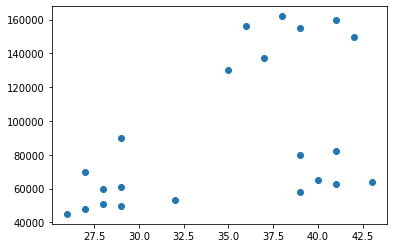

In [2]:
plt.scatter(df.Age,df['Income($)'])

In [3]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=3)

In [5]:
k.fit_predict(df[['Age','Income($)']])

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [7]:
df['cluster']=k.fit_predict(df[['Age','Income($)']])

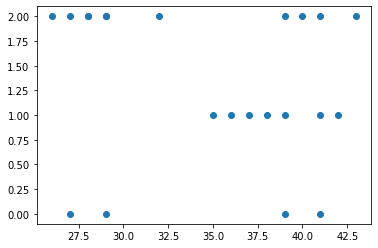

In [8]:
plt.scatter(df['Age'],df['cluster'])

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No handles with labels found to put in legend.


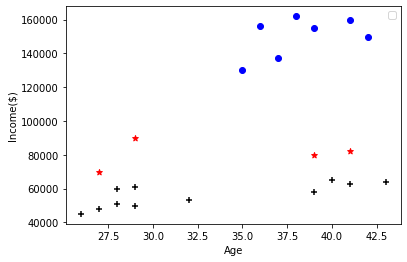

In [20]:
plt.scatter(df1.Age,df1['Income($)'],color='red',marker='*')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='+')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

In [26]:
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [27]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [28]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


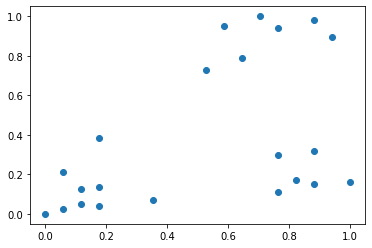

In [29]:
plt.scatter(df.Age,df['Income($)'])

In [31]:
y_predict=k.fit_predict(df[['Age','Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [32]:
df['Cluster']=y_predict

In [35]:
df.drop('cluster',axis='columns')

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [36]:
k.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [39]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

No handles with labels found to put in legend.


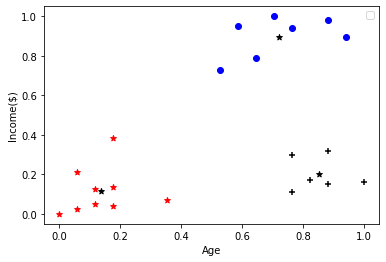

In [41]:
plt.scatter(df1.Age,df1['Income($)'],color='red',marker='*')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black',marker='+')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],marker="*",color="black")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [43]:
from sklearn.cluster import KMeans

In [46]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [48]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1797884689320676,
 0.13781880133764024,
 0.1062989742140513]

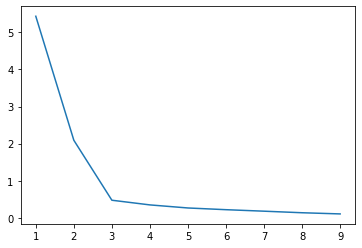

In [49]:
plt.plot(k_range,sse)